In [42]:
from keras.models import Model

In [43]:
!wget https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier/blob/master/resources/dogcat_model_bak.h5

--2021-01-06 09:42:25--  https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier/blob/master/resources/dogcat_model_bak.h5
Resolving github.com (github.com)... 13.229.188.59
Connecting to github.com (github.com)|13.229.188.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dogcat_model_bak.h5’

dogcat_model_bak.h5     [ <=>                ]  81.41K  --.-KB/s    in 0.1s    

2021-01-06 09:42:26 (825 KB/s) - ‘dogcat_model_bak.h5’ saved [83359]



In [44]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam

from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
from keras.models import load_model

classifier.load_weights("/content/dogcat_model_bak.h5")

OSError: Unable to open file (unable to open file: name = '/content/dogcat_model_bak.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [47]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

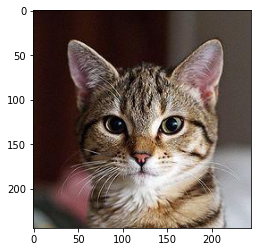

In [49]:
from keras_preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

img_path = 'cat.jpg'
#Input Image for Layer visualization
img1 = image.load_img(img_path)
plt.imshow(img1)

#preprocess image
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [51]:
classifier.predict(img)

array([[0.46625218]], dtype=float32)

In [52]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten_1', 'dense_2', 'dense_3']


In [54]:
from keras.models import Model

conv2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_2').output)
max_pooling2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_2').output)
conv2d_12_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_3').output)
max_pooling2d_12_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_3').output)

In [56]:
conv2d_11_features = conv2d_11_output.predict(img)
conv2d_12_features = conv2d_12_output.predict(img)
print('1st conv layer feature output shape : ',conv2d_11_features.shape)
print('2nd conv layer feature output shape : ',conv2d_12_features.shape)


max_pool_11_features = max_pooling2d_11_output.predict(img)
max_pool_12_features = max_pooling2d_12_output.predict(img)
print('1st max pool layer feature output shape:', max_pool_11_featues.shape)
print('2nd max pool layer feature output shape:', max_pool_12_featues.shape)

1st conv layer feature output shape :  (1, 62, 62, 32)
2nd conv layer feature output shape :  (1, 29, 29, 32)
1st max pool layer feature output shape: (1, 31, 31, 32)
2nd max pool layer feature output shape: (1, 14, 14, 32)


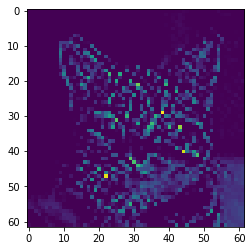

In [57]:
# show filter 4 image
plt.imshow(conv2d_11_features[0, :, :, 4])

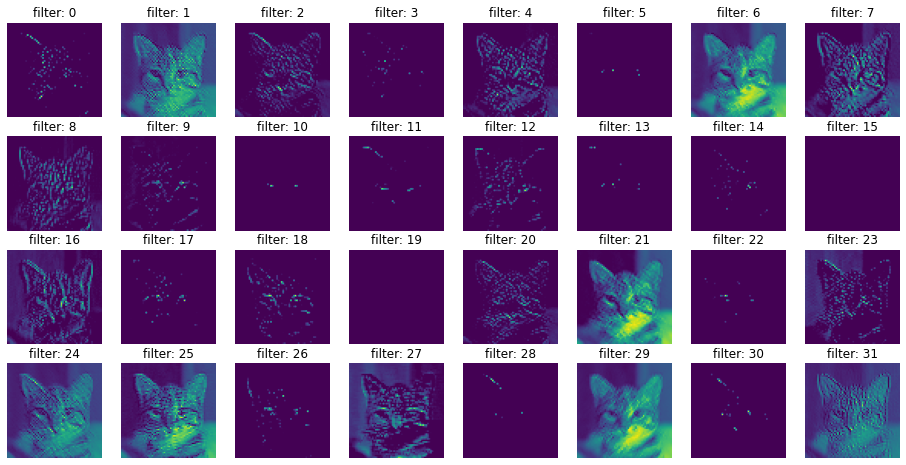

In [58]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_11_features[0, :, :, i])
plt.show()

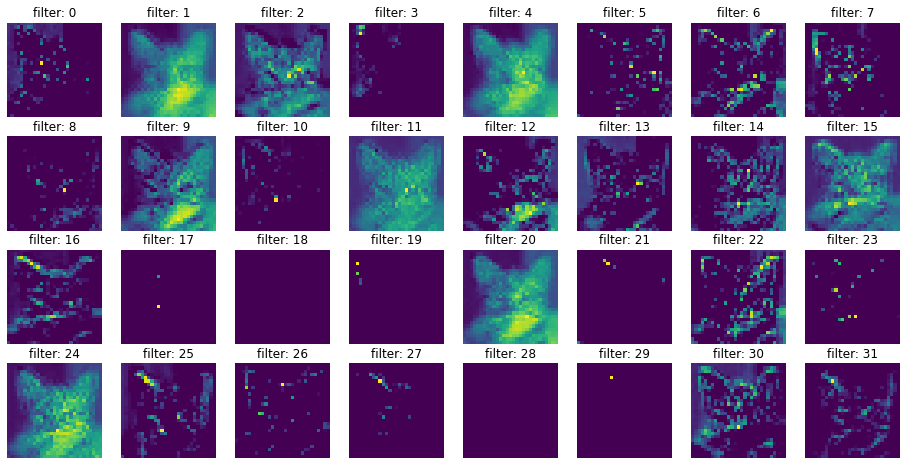

In [59]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_12_features[0, :, :, i])
plt.show()

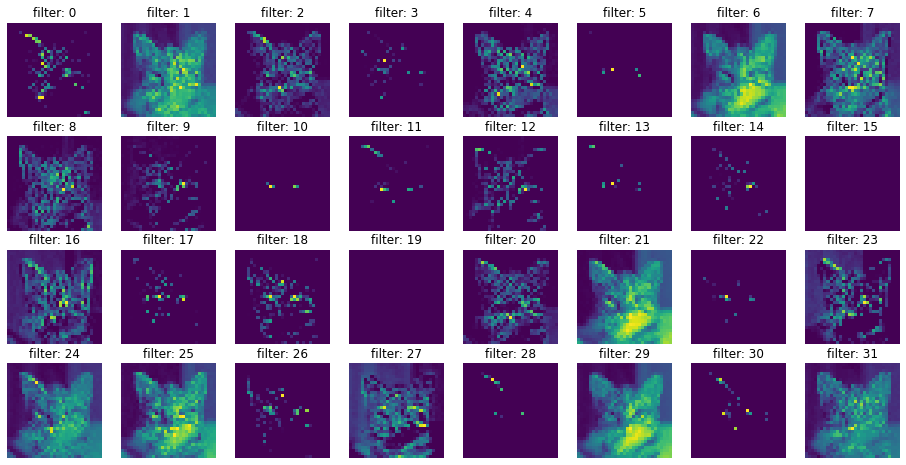

In [60]:
# 1st max pooling
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_11_features[0, :, :, i])
plt.show()

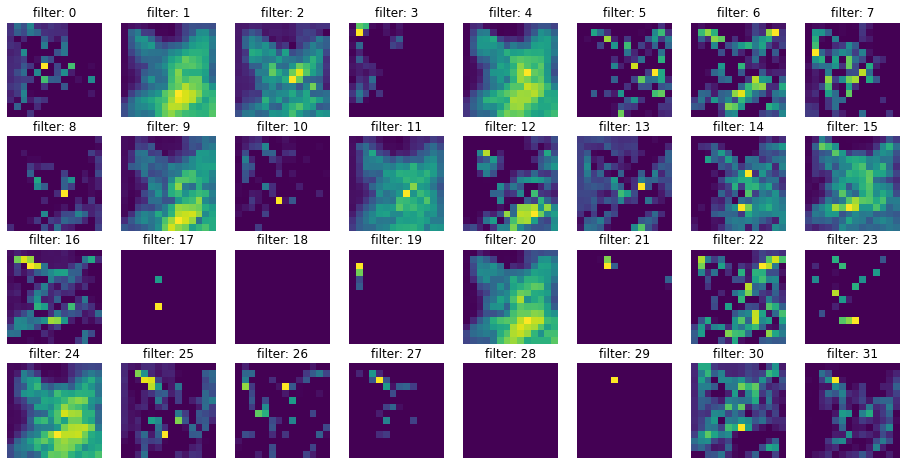

In [61]:
# 2nd max pooling
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_12_features[0, :, :, i])
plt.show()

In [68]:
dense_output = Model(inputs=classifier.input, outputs=classifier.get_layer('dense_2').output)
dense_features = dense_output.predict(img)
print('dense_feature_shape', dense_features.shape)

dense_feature_shape (1, 128)


In [69]:
print(dense_features[0].flatten())

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.34752335e-02 7.94094354e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.03745925e-01 2.34972060e-01
 4.78610843e-02 1.40888225e-02 2.92413175e-01 1.46358818e-01
 5.38509041e-02 1.07664153e-01 0.00000000e+00 4.38314021e-01
 5.37031330e-04 0.00000000e+00 2.73075908e-01 5.13108484e-02
 1.91696599e-01 9.85898003e-02 1.18899830e-01 3.48588564e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.70097396e-01
 3.82989552e-03 2.47914791e-02 0.00000000e+00 4.31073040e-01
 0.00000000e+00 0.00000000e+00 1.32498994e-01 1.90586776e-01
 1.57119378e-01 0.00000000e+00 1.56423509e-01 2.71406144e-01
 1.97596297e-01 0.00000000e+00 1.12902515e-01 1.59010217e-01
 1.68018535e-01 1.19917408e-01 3.26603800e-02 0.00000000e+00
 0.00000000e+00 2.43241921e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.31560901e-01 3.69644389e-02 0.00000000e+00 5.32528497e-02
 9.72516313e-02 3.412941